<a href="https://colab.research.google.com/github/Abishekok/home-_stayas_data_analysis_sing_Machine_learning/blob/main/Homestats_data__analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
from datetime import datetime
import numpy as np


In [69]:
df = pd.read_excel("/content/drive/MyDrive/Cerina/Homestays_Data.xlsx")

In [70]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [71]:
columns = df.columns
columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [73]:
amenities = df['amenities']
amenities

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object

# Feature Engineering

In [74]:
current_date = datetime.now()
df['host_since'] = pd.to_datetime(df['host_since'])

#Host tenure
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365.25

In [75]:
# Amenities_count
df['Amenities_Count'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [76]:
df['Amenities_Count']

0         9
1        15
2        19
3        15
4        12
         ..
74106     1
74107    16
74108    31
74109    15
74110    18
Name: Amenities_Count, Length: 74111, dtype: int64

# Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,74111.0,11266617.102468,344.0,6261964.5,12254147.0,16402260.5,21230903.0,6081734.886894
log_price,74111.0,4.782069,0.0,4.317488,4.70953,5.220356,7.600402,0.717394
accommodates,74111.0,3.155146,1.0,2.0,2.0,4.0,16.0,2.153589
bathrooms,73911.0,1.235263,0.0,1.0,1.0,1.0,8.0,0.582044
first_review,58247,2016-01-14 08:11:51.013442560,2008-11-17 00:00:00,2015-06-28 00:00:00,2016-05-25 00:00:00,2017-01-02 00:00:00,2017-10-05 00:00:00,NaN
host_response_rate,55812.0,0.94352,0.0,1.0,1.0,1.0,1.0,0.163418
host_since,73923,2014-07-21 01:55:09.849437696,2008-03-03 00:00:00,2013-04-21 00:00:00,2014-09-28 00:00:00,2015-12-22 00:00:00,2017-10-04 00:00:00,NaN
last_review,58284,2017-03-14 19:27:18.789376,2009-01-21 00:00:00,2017-01-09 00:00:00,2017-04-28 00:00:00,2017-09-08 00:00:00,2017-10-05 00:00:00,NaN
latitude,74111.0,38.445958,33.338905,34.127908,40.662138,40.746096,42.390437,3.080167
longitude,74111.0,-92.397525,-122.5115,-118.342374,-76.996965,-73.95466,-70.985047,21.705322


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

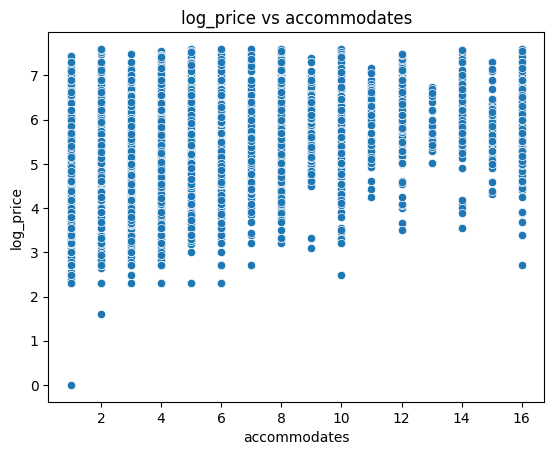

In [ ]:
sns.scatterplot(data=df, x='accommodates', y='log_price')
plt.title('log_price vs accommodates')
plt.show()

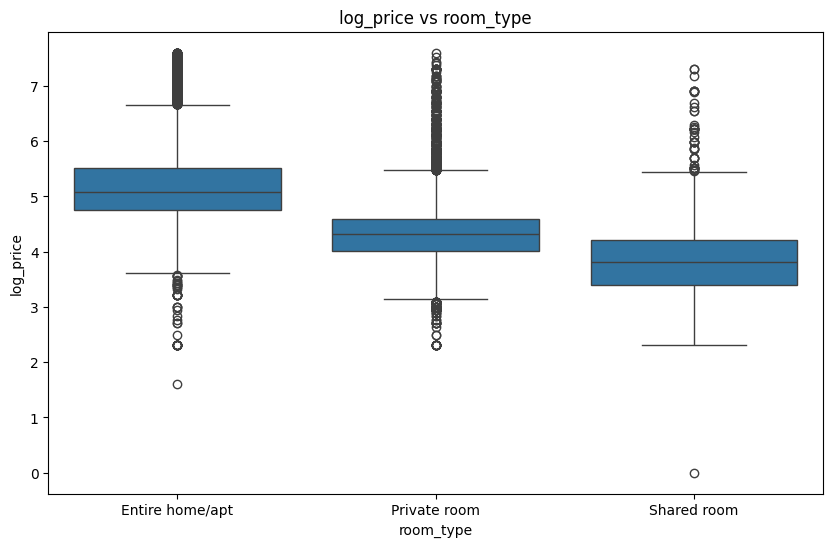

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='log_price')
plt.title('log_price vs room_type')
plt.show()

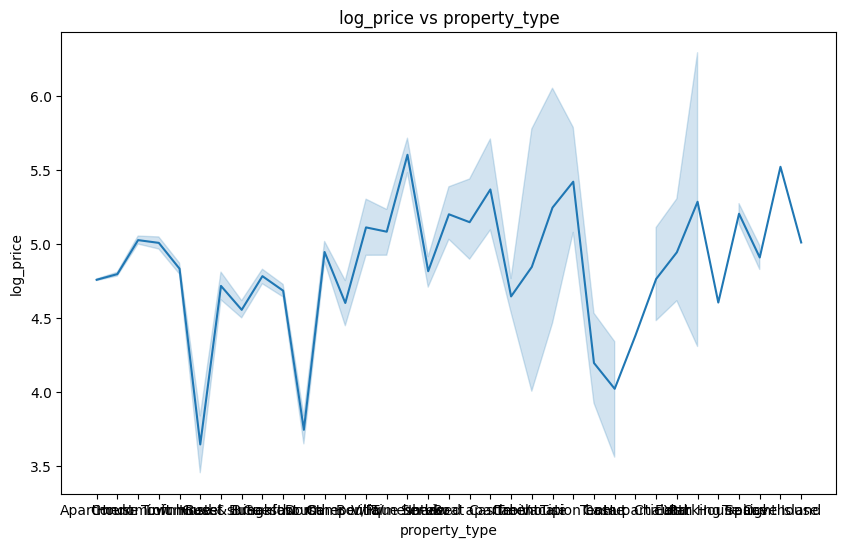

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='property_type', y='log_price')
plt.title('log_price vs property_type')
plt.show()

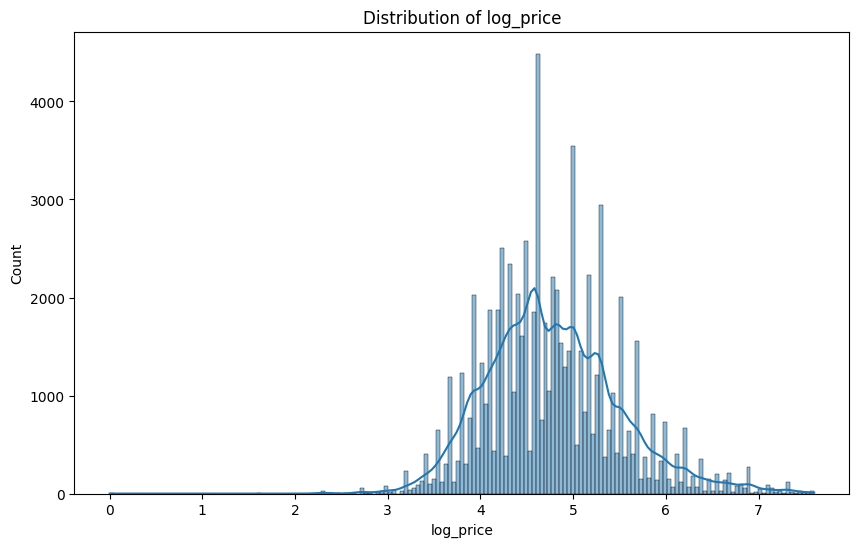

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of log_price')
plt.show()

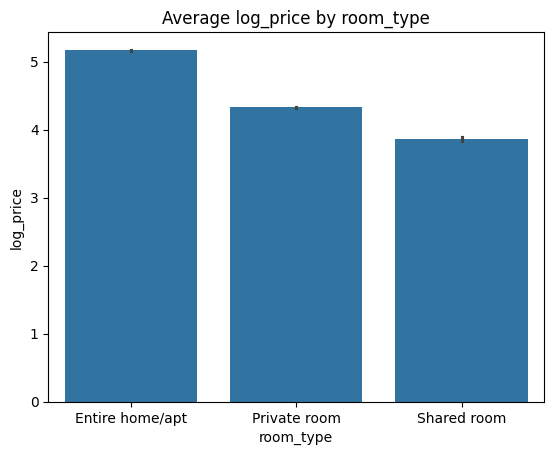

In [ ]:
sns.barplot(data=df, x='room_type', y='log_price')
plt.title('Average log_price by room_type')
plt.show()

In [ ]:
correlation_matrix = df[['log_price', 'accommodates', 'number_of_reviews']].corr()

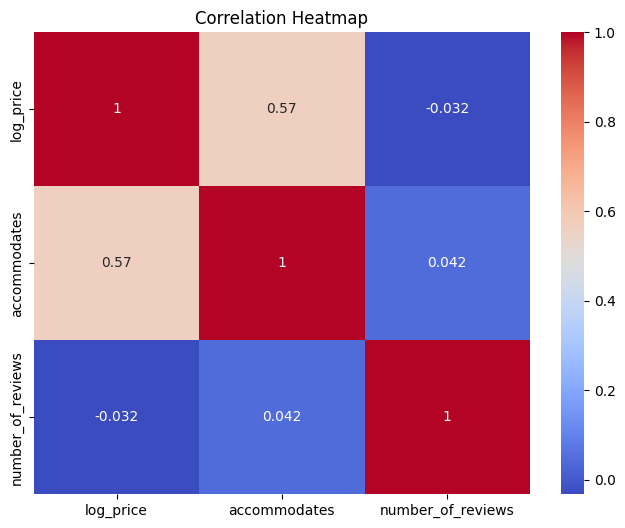

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Geospatial Analysis:

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
df_geo = df[['latitude', 'longitude', 'log_price']]

In [ ]:
map_geo = folium.Map(location=[df_geo['latitude'].mean(), df_geo['longitude'].mean()], zoom_start=10)

In [ ]:
marker_cluster = MarkerCluster().add_to(map_geo)

In [ ]:
for index, row in df_geo.iterrows():
    popup_text = f"Listing ID: {index}<br>Log Price: {row['log_price']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster)

In [ ]:
map_geo.save('listings_map.html')

In [ ]:
map_geo

# Sentiment Analysis on Textual Data:

In [1]:
!pip install nltk

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

In [30]:
data = pd.read_excel("/content/drive/MyDrive/Cerina/Homestays_Data.xlsx")

In [31]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [32]:
text_df = {'description':data['description'].copy()}
text_df = pd.DataFrame(text_df)

In [16]:
text_df

,description
0,"Beautiful, sunlit brownstone 1-bedroom in the ..."
1,Enjoy travelling during your stay in Manhattan...
2,The Oasis comes complete with a full backyard ...
3,This light-filled home-away-from-home is super...
4,"Cool, cozy, and comfortable studio located in ..."
...,...
74106,one room in bushwick apt
74107,"Located on the Pacific Coast Highway, this apa..."
74108,A modern apartment located in East Williamsbur...
74109,"Fully renovated, designer's studio located in ..."


In [33]:
!pip install textblob

In [34]:
from textblob import TextBlob

In [37]:
def get_sentiment(text):
  analysis = TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 1 # positive
  else:
    return 0 # negative


In [39]:
text_df['description'] = text_df['description'].astype(str)

In [40]:
text_df['sentiment'] = text_df['description'].apply(get_sentiment)

In [41]:
text_df

,description,sentiment
0,"Beautiful, sunlit brownstone 1-bedroom in the ...",1
1,Enjoy travelling during your stay in Manhattan...,1
2,The Oasis comes complete with a full backyard ...,1
3,This light-filled home-away-from-home is super...,1
4,"Cool, cozy, and comfortable studio located in ...",1
...,...,...
74106,one room in bushwick apt,1
74107,"Located on the Pacific Coast Highway, this apa...",1
74108,A modern apartment located in East Williamsbur...,1
74109,"Fully renovated, designer's studio located in ...",1


In [43]:
text_df['sentiment'].value_counts()

sentiment
1    72188
0     1923
Name: count, dtype: int64

In [44]:
text_df['tokenization_text'] = text_df['description'].apply(nltk.word_tokenize)

In [45]:
text_df

,description,sentiment,tokenization_text
0,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,"[Beautiful, ,, sunlit, brownstone, 1-bedroom, ..."
1,Enjoy travelling during your stay in Manhattan...,1,"[Enjoy, travelling, during, your, stay, in, Ma..."
2,The Oasis comes complete with a full backyard ...,1,"[The, Oasis, comes, complete, with, a, full, b..."
3,This light-filled home-away-from-home is super...,1,"[This, light-filled, home-away-from-home, is, ..."
4,"Cool, cozy, and comfortable studio located in ...",1,"[Cool, ,, cozy, ,, and, comfortable, studio, l..."
...,...,...,...
74106,one room in bushwick apt,1,"[one, room, in, bushwick, apt]"
74107,"Located on the Pacific Coast Highway, this apa...",1,"[Located, on, the, Pacific, Coast, Highway, ,,..."
74108,A modern apartment located in East Williamsbur...,1,"[A, modern, apartment, located, in, East, Will..."
74109,"Fully renovated, designer's studio located in ...",1,"[Fully, renovated, ,, designer, 's, studio, lo..."


In [46]:
# Removing stop word and punctuvation
stop_words = set(nltk.corpus.stopwords.words('english'))
text_df['clean_text'] = text_df['tokenization_text'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words] )

In [47]:
# clean_text to str
text_df['clean_text'] = text_df['clean_text'].apply(lambda x: ''.join(x))

In [65]:
text_df[text_df['sentiment'] == 0]


,description,sentiment,tokenization_text,clean_text
53,his apartment in exceptionally clean from head...,0,"[his, apartment, in, exceptionally, clean, fro...",apartmentexceptionallycleanheadtoelocatednext1...
116,æ°‘å®¿ä¹‹å®¶ æŽ¥å—è¯•ä½~ æä¾› æŽ¥é€æœºæœ...,0,"[æ°, ‘, å®¿ä¹‹å®¶, æŽ¥å—è¯•ä½~, æä¾›, æŽ¥é...",ÿå¹¼åÿçtarget
183,"Chinatown, Manhattan",0,"[Chinatown, ,, Manhattan]",chinatownmanhattan
190,ä½äºŽç½—å…°å²—ä¸­å¿ƒç¹åŽåŒºçš„å°é—­å¼ç®¡ç...,0,"[ä½äºŽç½—å…°å²—ä¸­å¿ƒç¹åŽåŒºçš, „, å°é—­å¼...",çççµç½çÿçççšçå¾ˆæç178puentehillsmallelmontesta...
334,Only one minute by walk Hollywood walk of fame,0,"[Only, one, minute, by, walk, Hollywood, walk,...",oneminutewalkhollywoodwalkfame
...,...,...,...,...
73858,Our apartment is a cozy little 3 bed/1 bath in...,0,"[Our, apartment, is, a, cozy, little, 3, bed/1...",apartmentcozylittle3bathbernalheightsclosesout...
73890,"è¯¥æˆ¿æºä½äºŽç½—å…°å²—å±±æ™¯åŒº,ç¦»æœºåœº40-...",0,"[è¯¥æˆ¿æºä½äºŽç½—å…°å²—å±±æ™¯åŒº, ,, ç¦, », ...",ÿçšÿ
73895,It's a private room in a 2 bedroom apartment. ...,0,"[It, 's, a, private, room, in, a, 2, bedroom, ...",privateroom2bedroomapartmentattachedbathroompr...
73936,æˆ¿å­ä½äºŽç½—å…°å²—ç¹åŽå•†åœˆä¸­å¿ƒåœ°å¸¦ã...,0,[æˆ¿å­ä½äºŽç½—å…°å²—ç¹åŽå•†åœˆä¸­å¿ƒåœ°å¸¦...,çš³çÿåœççæƒåœècotscoäÿäçÿœåÿçšæ


In [49]:
# Split train/text set
x_train, x_test, y_train, y_test = train_test_split(text_df['clean_text'], text_df['sentiment'], test_size = 0.2, random_state = 42)

In [50]:
# Vector text data
tfidf_vectorizer = TfidfVectorizer(max_features = 1000)

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.fit_transform(x_test)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [52]:
# Training with Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_tfidf, y_train)

MultinomialNB()

In [54]:
# Model Evaluation
train_preds = nb_classifier.predict(x_train_tfidf)
accuracy = accuracy_score(y_train, train_preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736202941573336


In [53]:
# Model Evaluation
test_preds = nb_classifier.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, test_preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9757808810632126


In [55]:
def sample_input(text):
  token = nltk.word_tokenize(text) # Tokenization

  clean_token = text_input_preprocessing = [word.lower() for word in token if word.isalnum() and word.lower() not in stop_words] # Removing stop words and punctuation
  clean_text = ' '.join(clean_token)
  text_sample_tfidf = tfidf_vectorizer.transform([clean_text])
  prediction = nb_classifier.predict(text_sample_tfidf)
  return print(f'Prediction: {prediction}')



In [67]:
# Sample Prediction
text_input = input('enter text here')

sample_input(text_input)

enter text herehis apartment in exceptionally clean from head to toe, I'm located next to the 101 and the 405 freeway grocery store is half block there is a pool, laundry and parking  inside the complex. 
Prediction: [1]


# Log_price Prediction

After trying out various models, all of them initially gave me poor predictions. However, with the assistance of feature importance analysis, I identified the top 20 features for prediction. Following this refinement process, Random Forest outperformed the other models, resulting in a significantly more accurate outcome."

In [77]:
import numpy as np
import pandas as pd
from datetime import datetime

In [78]:
df = pd.read_excel("/content/drive/MyDrive/Cerina/Homestays_Data.xlsx")

In [79]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [80]:
df['cleaning_fee']

0         True
1         True
2         True
3         True
4         True
         ...  
74106    False
74107     True
74108     True
74109     True
74110    False
Name: cleaning_fee, Length: 74111, dtype: bool

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [82]:
current_date = datetime.now()
df['host_since'] = pd.to_datetime(df['host_since'])

#Host tenure
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365.25

In [83]:
# Amenities_count
df['Amenities_Count'] = df['amenities'].apply(lambda x: len(x.split(',')))

In [84]:
# Days Since Last Review
df['last_review'] = pd.to_datetime(df['last_review'])

df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days
df['Days_Since_Last_Review'][25]

2417.0

In [85]:
len(df)

74111

In [ ]:
# numerical
# log_price, accommodates,accommodates, host_response_rate, first_review, host_since, number_of_reviews, review_scores_rating, zipcode, bedroom, beds

# categorical
# property_type, room_type, bed_type, cleaning_fee, cancellation_policy, city

In [86]:
train_size = int(.75 * len(df))
train_size

55583

In [87]:
sorted_df = df.sort_values('host_since')
train_df, test_df = sorted_df[:train_size], sorted_df[train_size:]

In [88]:
len(train_df), len(test_df)

(55583, 18528)

In [89]:
train_df.host_since.min(), train_df.host_since.max()

(Timestamp('2008-03-03 00:00:00'), Timestamp('2015-12-27 00:00:00'))

In [90]:
test_df.host_since.min(), test_df.host_since.max()

(Timestamp('2015-12-27 00:00:00'), Timestamp('2017-10-04 00:00:00'))

In [91]:
input_col = ['accommodates', 'host_response_rate', 'first_review', 'host_since', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'property_type', 'room_type', 'bed_type', 'cleaning_fee', 'cancellation_policy', 'city']

In [92]:
target_col = 'log_price'

In [93]:
train_input = train_df[input_col].copy()
train_target = train_df[target_col].copy()

In [94]:
test_input = test_df[input_col].copy()
test_target = test_df[target_col].copy()

In [151]:
numeric_col = ['accommodates', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
categorical_col = ['property_type', 'room_type', 'bed_type', 'cleaning_fee', 'cancellation_policy', 'city']

Imputation, Scaling

In [152]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(train_input[numeric_col])


In [153]:
train_input[numeric_col] = imputer.transform(train_input[numeric_col])
test_input[numeric_col] = imputer.transform(test_input[numeric_col])

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_input[numeric_col])


In [155]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [157]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_input[categorical_col])
encoded_col = list(encoder.get_feature_names_out(categorical_col))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [158]:
train_input[encoded_col] = encoder.transform(train_input[categorical_col])
test_input[encoded_col] = encoder.transform(test_input[categorical_col])

In [184]:
columns_for_prediction = ['room_type_Entire home/apt', 'bedrooms','number_of_reviews', 'accommodates', 'review_scores_rating',
                      'host_response_rate', 'beds', 'city_SF', 'city_LA', 'cancellation_policy_strict',
                      'cancellation_policy_moderate', 'cancellation_policy_flexible', 'city_DC', 'property_type_House',
                      'cleaning_fee_True', 'cleaning_fee_False', 'property_type_Apartment', 'city_Chicago', 'city_NYC',
                      'property_type_Condominium']

In [160]:
x_train = train_input[['room_type_Entire home/apt', 'bedrooms','number_of_reviews', 'accommodates', 'review_scores_rating',
                      'host_response_rate', 'beds', 'city_SF', 'city_LA', 'cancellation_policy_strict',
                      'cancellation_policy_moderate', 'cancellation_policy_flexible', 'city_DC', 'property_type_House',
                      'cleaning_fee_True', 'cleaning_fee_False', 'property_type_Apartment', 'city_Chicago', 'city_NYC',
                      'property_type_Condominium']]

x_test = test_input[['room_type_Entire home/apt', 'bedrooms','number_of_reviews', 'accommodates', 'review_scores_rating',
                    'host_response_rate', 'beds', 'city_SF', 'city_LA', 'cancellation_policy_strict',
                    'cancellation_policy_moderate', 'cancellation_policy_flexible', 'city_DC', 'property_type_House',
                    'cleaning_fee_True', 'cleaning_fee_False', 'property_type_Apartment', 'city_Chicago', 'city_NYC',
                    'property_type_Condominium']]

In [161]:
x_train.head()

,room_type_Entire home/apt,bedrooms,number_of_reviews,accommodates,review_scores_rating,host_response_rate,beds,city_SF,city_LA,cancellation_policy_strict,cancellation_policy_moderate,cancellation_policy_flexible,city_DC,property_type_House,cleaning_fee_True,cleaning_fee_False,property_type_Apartment,city_Chicago,city_NYC,property_type_Condominium
72898,1.0,0.1,0.365289,0.066667,0.962500,1.000000,0.055556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48876,1.0,0.1,0.000000,0.133333,0.927698,0.945898,0.055556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
24742,0.0,0.1,0.009917,0.066667,1.000000,0.945898,0.055556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
68396,1.0,0.2,0.003306,0.333333,0.750000,1.000000,0.166667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7461,1.0,0.3,0.001653,0.333333,0.750000,0.945898,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [162]:
x_test.head()

,room_type_Entire home/apt,bedrooms,number_of_reviews,accommodates,review_scores_rating,host_response_rate,beds,city_SF,city_LA,cancellation_policy_strict,cancellation_policy_moderate,cancellation_policy_flexible,city_DC,property_type_House,cleaning_fee_True,cleaning_fee_False,property_type_Apartment,city_Chicago,city_NYC,property_type_Condominium
62649,1.0,0.4,0.001653,0.400000,1.000000,0.945898,0.388889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1539,0.0,0.1,0.006612,0.066667,0.875000,0.945898,0.055556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
26034,1.0,0.1,0.092562,0.200000,0.975000,1.000000,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5800,0.0,0.1,0.000000,0.000000,0.927698,1.000000,0.055556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
63440,1.0,0.4,0.001653,0.400000,0.927698,0.945898,0.222222,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Baseline Model

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
linreg = LinearRegression()

In [165]:
linreg.fit(x_train, train_target)

LinearRegression()

In [166]:
train_preds = linreg.predict(x_train)

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
test_preds = linreg.predict(x_test)
test_preds

array([5.85245835, 4.36837137, 4.95055978, ..., 4.32815412, 4.38956178,
       4.25726232])

In [169]:
mean_squared_error(test_preds, test_target, squared=False)

0.5395472459194902

In [170]:
def try_model(model):
    # Fit model
    model.fit(x_train, train_target)

    # predictions
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)

    # RMSE
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    test_rmse = mean_squared_error(test_target, test_preds, squared=False)
    return train_rmse, test_rmse

In [171]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [172]:
try_model(LinearRegression())

(0.47081300027825934, 0.5395472459194902)

In [173]:
try_model(Ridge())

(0.47081413555357177, 0.5395472459194902)

In [174]:
try_model(Lasso())

(0.69394803621128, 0.5395472459194902)

In [175]:
try_model(ElasticNet())

(0.69394803621128, 0.5395472459194902)

In [118]:
try_model(SGDRegressor())

(0.47007594645527173, 238903141.82751876)

In [119]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [120]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)
# (0.22641088602780418, 238903141.82751876) -prediction without feature selection using feature importence

(0.22641088602780418, 238903141.82751876)

In [176]:
import matplotlib.pyplot as plt

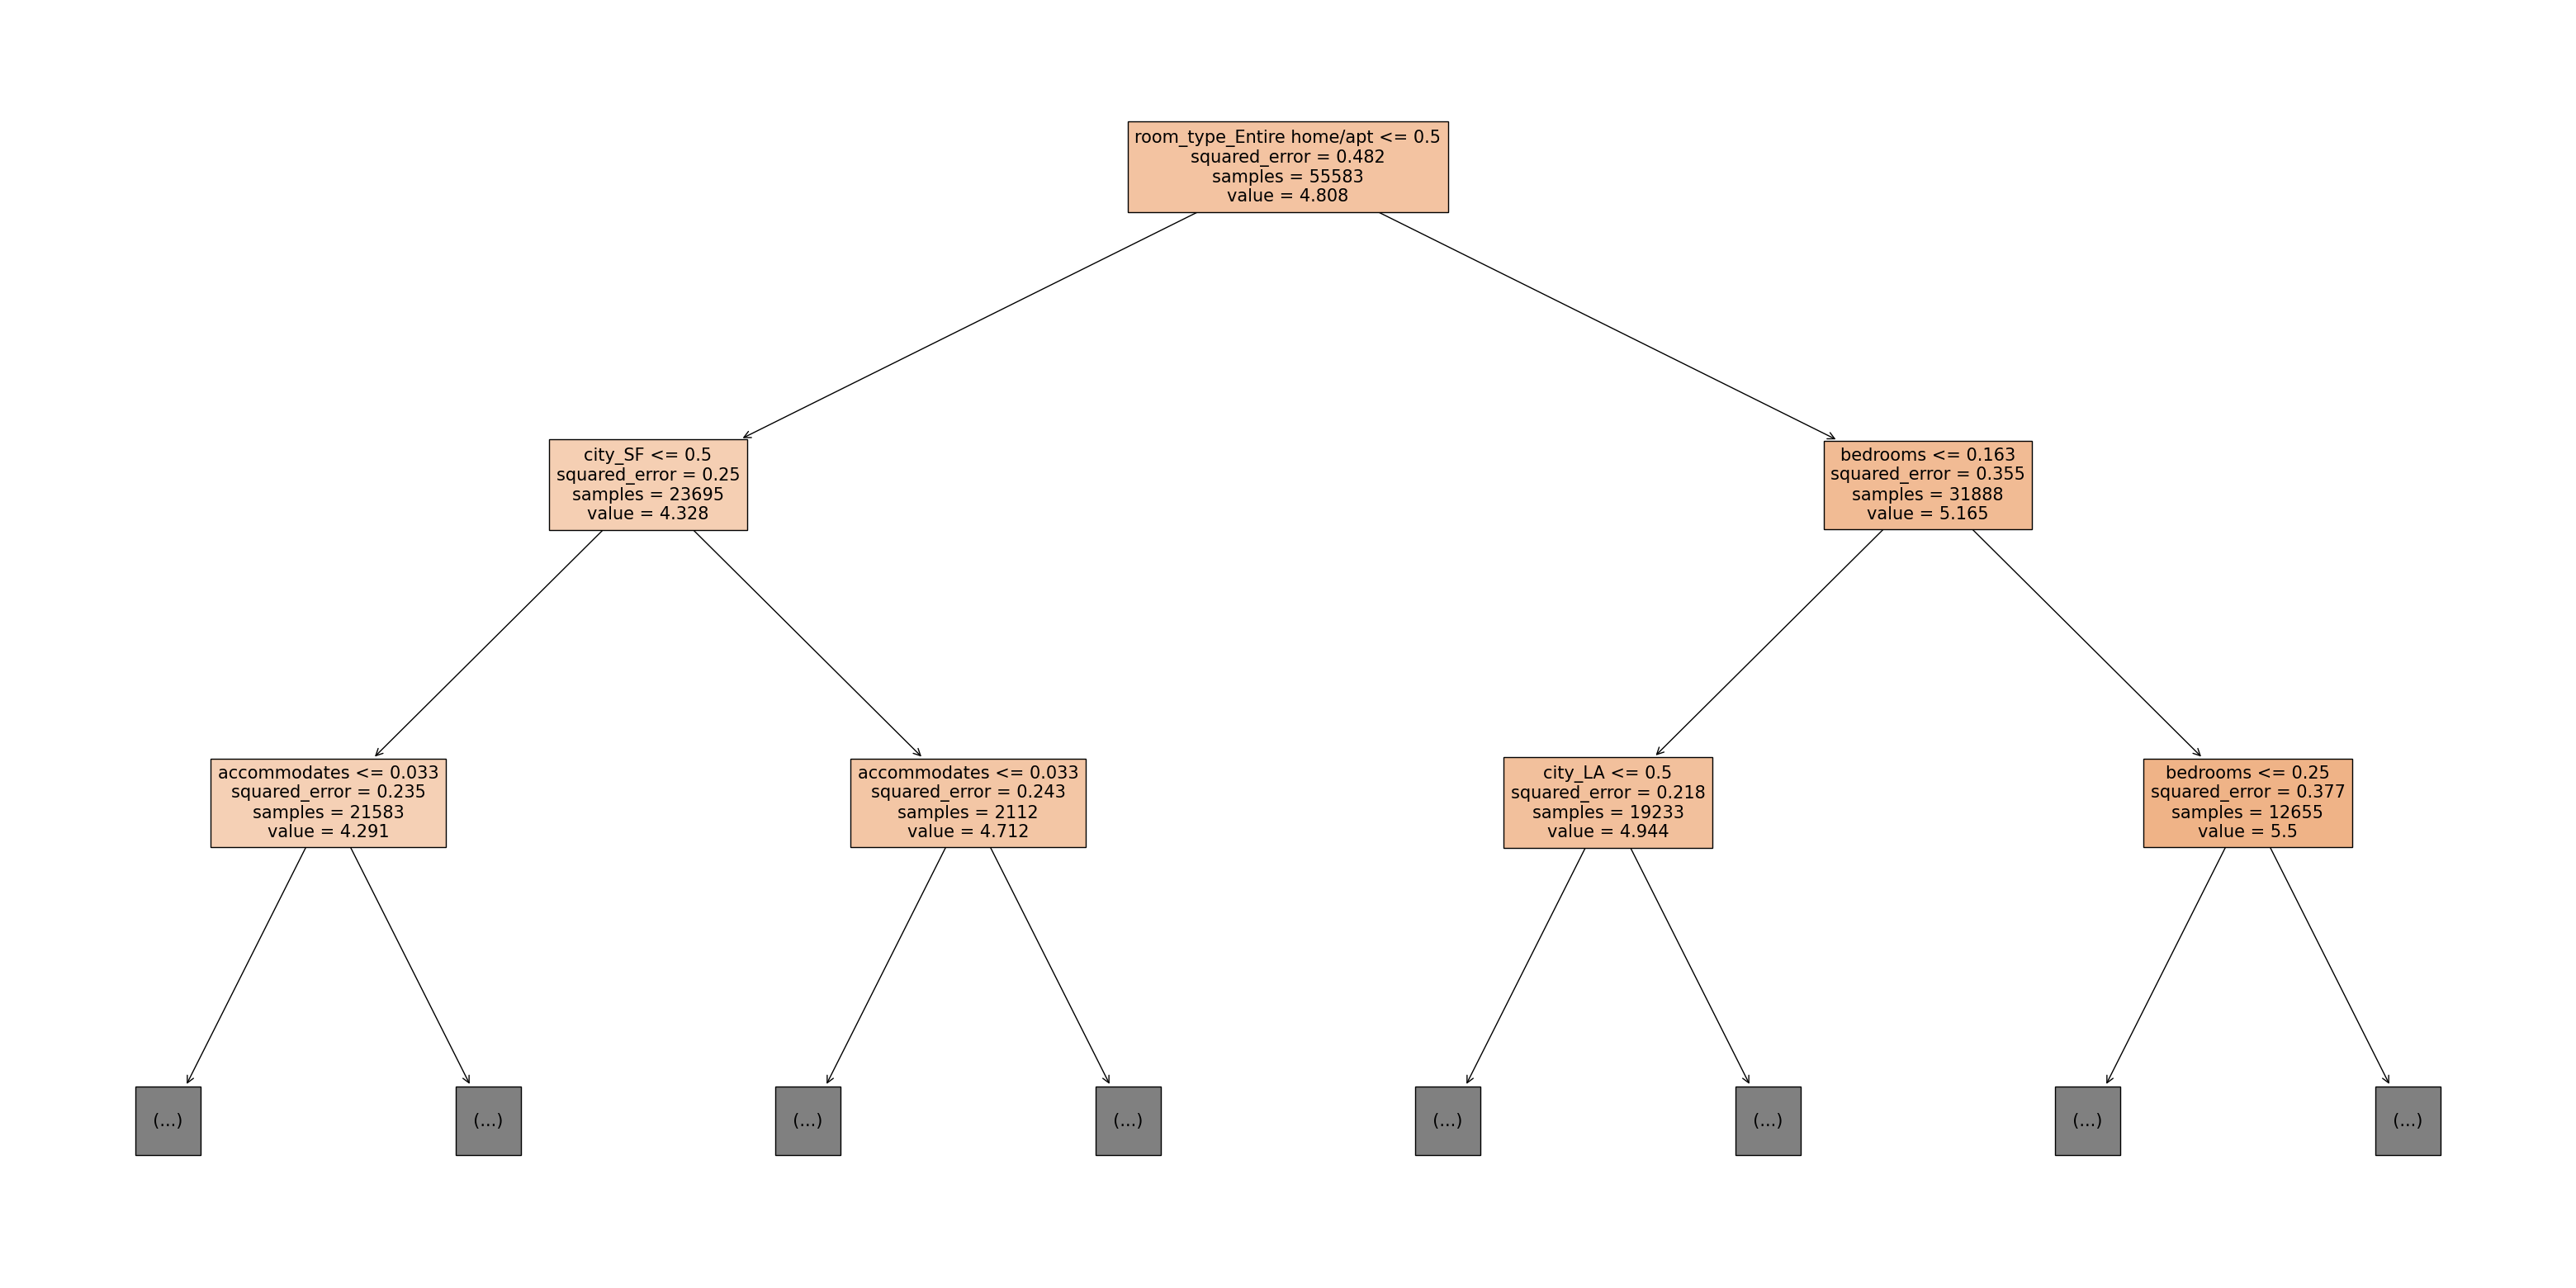

In [177]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=2, filled=True, feature_names=numeric_col+encoded_col);

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

(0.27460775372496693, 0.5395472459194902)

In [180]:
rf.feature_importances_

array([0.39466662, 0.14998299, 0.11228585, 0.05320863, 0.05083897,
       0.05087697, 0.03053784, 0.02315735, 0.01732185, 0.01337653,
       0.0114171 , 0.01141429, 0.01106694, 0.01179039, 0.01038925,
       0.0105443 , 0.01339876, 0.00818365, 0.00940616, 0.00613555])

In [186]:
importance_df = pd.DataFrame({
    'feature': columns_for_prediction,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,room_type_Entire home/apt,0.394667
1,bedrooms,0.149983
2,number_of_reviews,0.112286
3,accommodates,0.053209
5,host_response_rate,0.050877
4,review_scores_rating,0.050839
6,beds,0.030538
7,city_SF,0.023157
8,city_LA,0.017322
16,property_type_Apartment,0.013399


In [129]:
import seaborn as sns

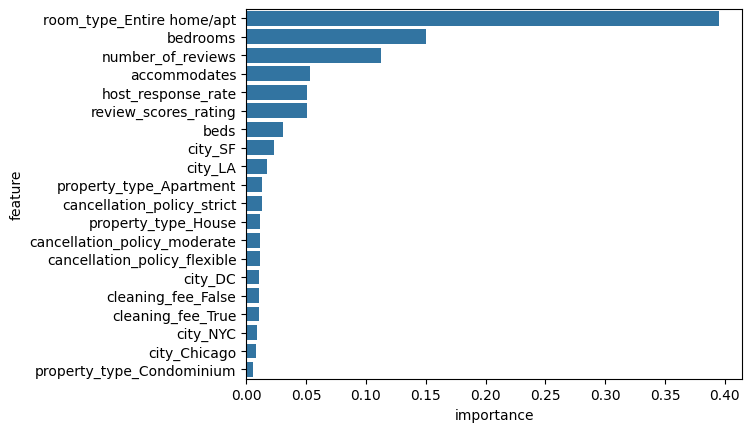

In [187]:
sns.barplot(data=importance_df.head(20), x='importance', y='feature');